# Netflix EDA

### Amman Sajid

#### Dataset available at: *https://www.kaggle.com/datasets/shivamb/netflix-shows*

# Import Data and Libraries

In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [7]:
data_import = pd.read_csv("netflix_titles.csv")
data_import

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## High Level EDA

In [8]:
data_import.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data_import["date_added"] = pd.to_datetime(data_import["date_added"].str.strip(), format="%B %d, %Y")

In [10]:
data_import["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [11]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [12]:
data_import.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


### Date Analysis

In [13]:
fig = px.histogram(data_import, x="release_year",width=800, height=600)
fig.update_layout(bargap=0.2, title={'text':'Release Year Histogram',
                                     'y':0.95,
                                     'x':0.5,
                                     'xanchor':'center',
                                     'yanchor':'top'})
fig.show()

From the histogram it is clear to see that most of the content on Netflix has been released in the last 10 years. This could suggest that Netflix intends to prioritise newer releases over older titles. Out of curiosity we will check the title with the oldest release year on Netflix at the time this data was collected.


In [14]:
data_import[data_import["release_year"] == data_import["release_year"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [15]:
# Extract month from date_added
month_dict = {	1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December',
        0:"N/A"		
}

data_import["month_added"] = data_import["date_added"].dt.month.fillna(0).astype(int).map(month_dict)
data_import["month_added"]

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object

In [16]:
fig = px.histogram(data_import, x="date_added", color="month_added",width=800, height=600,
                    category_orders={'month_added':["January", "February", "March", "April",
                                                               "May", "June", "July", "August", 
                                                               "September", "October", "November", "December"]})
fig.update_layout(bargap=0.2, title={'text':'Date Added Histogram',
                                     'y':0.95,
                                     'x':0.5,
                                     'xanchor':'center',
                                     'yanchor':'top'}, 
                                     legend_title_text="Month",
                                    )
fig.show()

I would like to explore further with the date_added column. Does Netflix add more content to their website during specific months? We can use a histogram to plot the month_added column to answer this.

In [17]:
fig = px.histogram(data_import, x="month_added",width=800, height=600, category_orders={'month_added':["January", "February", "March", "April",
                                                               "May", "June", "July", "August", 
                                                               "September", "October", "November", "December"]})
fig.update_layout(bargap=0.2, title={'text':'Month Added Histogram',
                                     'y':0.95,
                                     'x':0.5,
                                     'xanchor':'center',
                                     'yanchor':'top'})
fig.show()

From the histogram there doesn't seem to be a seasonality trend for when Netflix adds content to their service. One thing to note is that February tends to have the least amount of added content but this could be due February being the shortest month in the year.

Let us see if there is a seasonality trend for days in the month for added title count.

In [18]:
# Extract day from date_added
data_import["day_added"] = data_import["date_added"].dt.day.fillna(0)

In [19]:
fig = px.histogram(data_import, x="day_added",width=800, height=600)
fig.update_layout(bargap=0.2, title={'text':'Day Added Histogram',
                                     'y':0.95,
                                     'x':0.5,
                                     'xanchor':'center',
                                     'yanchor':'top'})
fig.show()

From the histogram above it is evident that Netflix has a strong preference to add titles to their catalogue on the first of every month, with the middle of the month being the second biggest peak.

## String Column Analysis

In [20]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

#### Type Column

In [21]:
data_import["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

What is the split between the number of Movies and TV shows on Netflix?

Text(0.5, 0, 'Type')

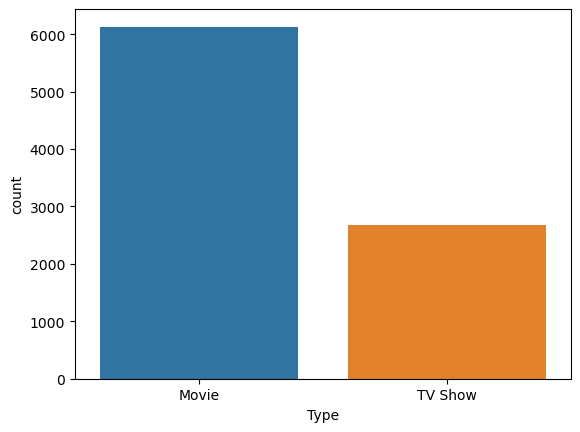

In [22]:
sns.countplot(data_import, x="type")
plt.xlabel("Type")

From the above plot we see that almost two thirds of the content in Netflix's catalogue were movies. To explain why Netflix chooses to do this would require domain knowledge from an expert in movie and tv show licensing. We would need to ask the expert whether it's easier or more cost-effective to license movies than TV shows. Furthermore, Netlfix uses user engagement data extensively to help them decide what movies and/or tv shows to license. For example, user data can give a better idea on what type of content the users tend to enjoy more. Without this useful data it is hard to tell what influences Netflix's decision to license certain content. Nontheless, it is quite interesting to see such a strong bias towards movies over TV shows.

In [23]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

In [24]:
# Let's take a look at the country column
data_import["country"].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

It seems that each title can have more than one country associated with it. To gain more insights from this data we will extract the indivual countries associated with each title.

In [25]:
data_import["country"].str.split(",", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [26]:
country_count = data_import.copy()
country_count = pd.concat([country_count, data_import["country"].str.split(",", expand=True)], axis=1)
country_count = country_count.melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")
country_count = country_count[country_count["Country"].notna()]
country_count["Country"] = country_count["Country"].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [27]:
fig = px.histogram(data_frame=country_count, x="Country", color="type")
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [28]:
# Lets get the top 10 countries for movie title count
top_10_countries_movies = country_count[country_count["type"] == "Movie"].groupby(by="Country").count()["title"].reset_index().sort_values(by="title", ascending=False)[:10]
top_10_countries_movies

,Country,title
111,United States,2752
42,India,962
110,United Kingdom,534
19,Canada,319
33,France,303
35,Germany,182
98,Spain,171
50,Japan,119
22,China,114
64,Mexico,111


In [29]:
fig = px.bar(data_frame=top_10_countries_movies, x="Country", y="title")
fig.update_layout(title="Top 10 Countries: Number of Movie Titles",
                  yaxis_title="Number of Movie Titles")
fig.show()

In [30]:
# Similarly lets get the top 10 countries for TV title count
top_10_countries_shows = country_count[country_count["type"] == "TV Show"].groupby(by="Country").count()["title"].reset_index().sort_values(by="title", ascending=False)[:10]
top_10_countries_shows

,Country,title
63,United States,938
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66
53,Spain,61


In [31]:
fig = px.bar(data_frame=top_10_countries_shows, x="Country", y="title", color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title="Top 10 Countries: Number of TV Show Titles",
                  yaxis_title="Number of TV Show Titles")
fig.show()

In [32]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month_added             object
day_added              float64
dtype: object

### Rating Column

Lets look at the ratings count for movies

To make analysis between movies and tv shows easier, I will split the dataset into two, one for movies and the other for TV shows

In [33]:
netflix_movies = data_import[data_import["type"] == "Movie"]
netflix_shows = data_import[data_import["type"] == "TV Show"]

In [34]:
netflix_movies.shape

(6131, 14)

In [35]:
# Remove any whitespace at leading and/or trailing end of rating strings
netflix_movies.loc[:,"rating"] = netflix_movies.loc[:,"rating"].str.strip()
netflix_movies["rating"].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

The "74 min", "84 min" and "66 min" seems to be incorrect entries for ratings so we will drop the rows as there are only 3 occurences.

In [36]:
rows_to_drop = ["74 min", "84 min", "66 min"]
netflix_movies = netflix_movies.drop(netflix_movies[netflix_movies["rating"].isin(rows_to_drop)].index)
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,24.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,24.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,24.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,March,9.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,20.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,1.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,11.0


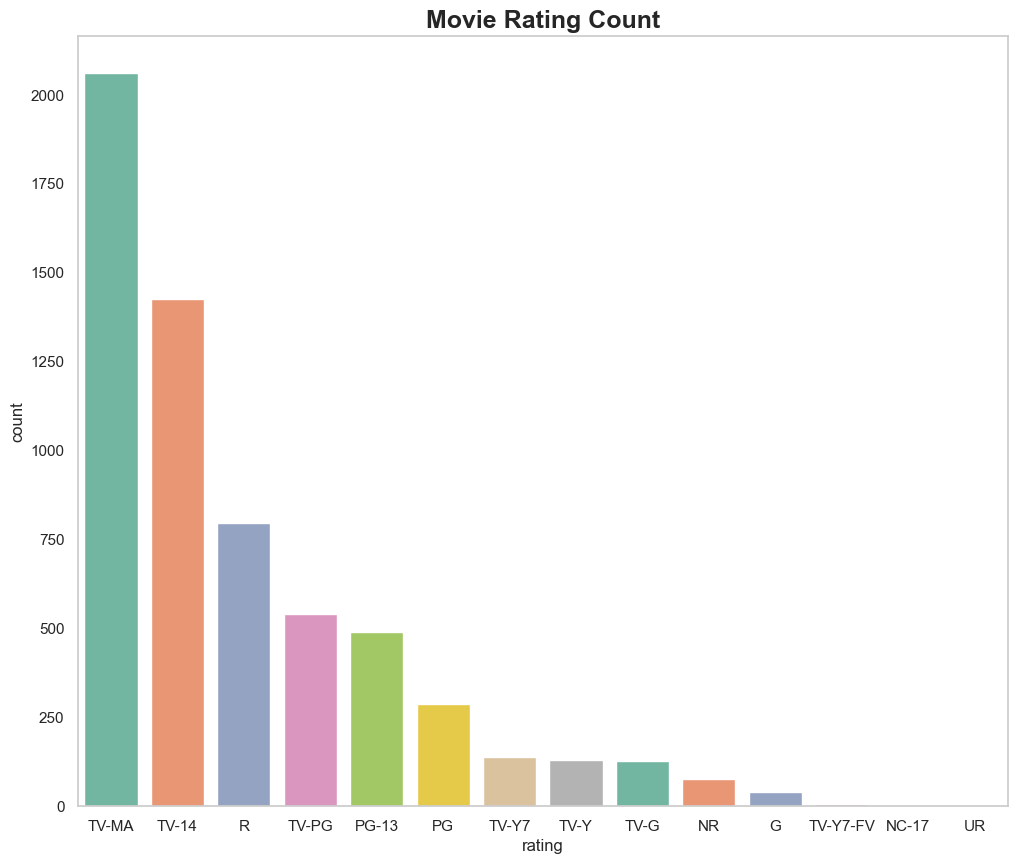

In [37]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(data=netflix_movies, x="rating", palette="Set2", order=netflix_movies["rating"].value_counts().index[:len(netflix_movies["rating"].unique())])
ax.grid(False)
plt.title("Movie Rating Count", fontdict=dict(size=18, fontweight="bold"))
plt.show()

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

Let's do a similar plot for Netflix tv shows.

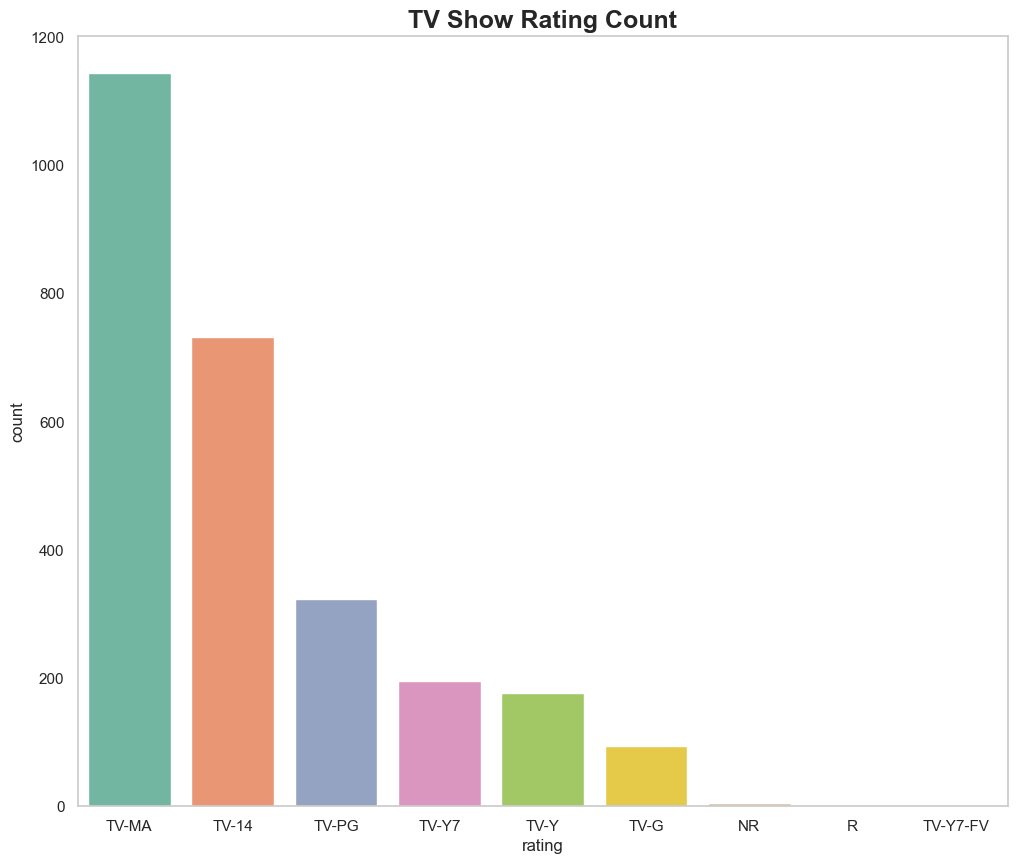

In [38]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(data=netflix_shows, x="rating", palette="Set2", order=netflix_shows["rating"].value_counts().index[:len(netflix_shows["rating"].unique())])
ax.grid(False)
plt.title("TV Show Rating Count", fontdict=dict(size=18, fontweight="bold"))
plt.show()

We see that again TV-MA is the most popular rating for TV shows followed by TV-14. It seems though that for both movies and TV shows, content for mature audiences is found in abundance in the Netflix catalogue which makes sense as we would expect the vast majority of Netlfix users to be young and mature adults. This could be further proven by using user data gathered by Netflix which could be used to find the age brackets that have the most activity on the site.

In [39]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

### Duration Column

In [40]:
# Lets investigate the movies dataset first
netflix_movies["duration"]

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6128, dtype: object

In [41]:
# Clean the duration column for plotting purposes
netflix_movies["duration"] = netflix_movies["duration"].str.replace("min", "")
netflix_movies["duration"] = netflix_movies["duration"].str.strip()
netflix_movies["duration"] = netflix_movies["duration"].astype(int)
netflix_movies["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int32

Text(0.5, 1.0, 'Netlfix Movies Histogram: Duration (minutes)')

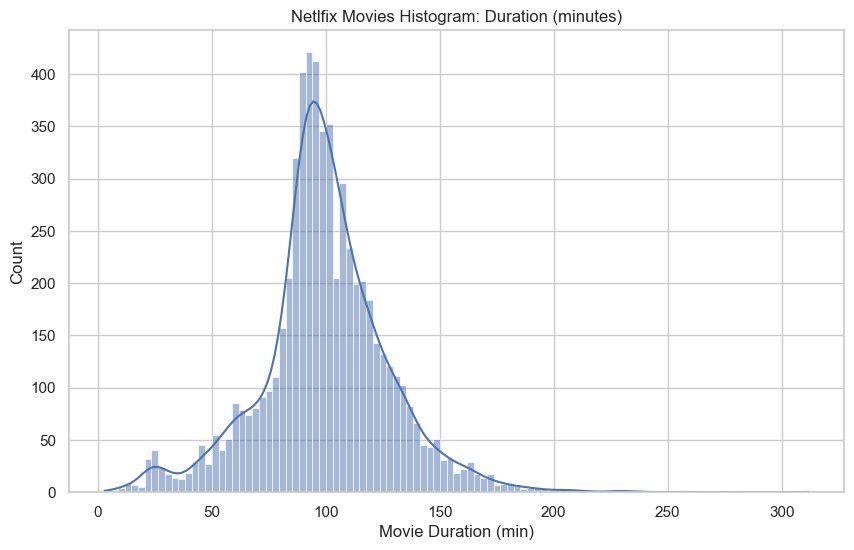

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=netflix_movies, x="duration", kde=True)
plt.xlabel("Movie Duration (min)")
plt.title("Netlfix Movies Histogram: Duration (minutes)")

Seems like most movie duration times fall between 75-120 mins. This seems reasonable as most movies nowadays dont't want long runtimes as audiences would be more comfortable paying attention to a 2hr movie rather than a 3 to 3.5hr long movie.

Lets find the top 20 longest duration movies on Netflix at the time.

In [43]:
top_20_longest_movies = netflix_movies[netflix_movies["duration"].index.isin(netflix_movies["duration"].nlargest(20).index)].sort_values("duration", ascending=False)
top_20_longest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",December,28.0
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,2021-06-15,2021,TV-G,273,Documentaries,"Do you want to relax, meditate or sleep deeply...",June,15.0
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,May,21.0
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,May,21.0
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,2020-05-21,1982,TV-PG,233,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,May,21.0
2488,s2489,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,2020-05-21,1984,TV-14,230,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,May,21.0
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,September,1.0
7932,s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,2019-12-31,1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,December,31.0
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",2021-04-17,2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",April,17.0
4573,s4574,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,2018-10-01,2008,TV-14,214,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",October,1.0


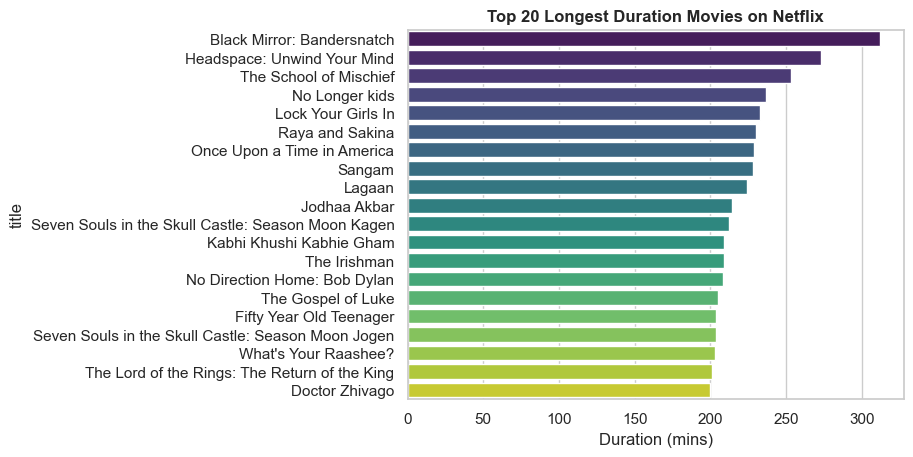

In [44]:
sns.barplot(data=top_20_longest_movies, x="duration", y="title", orient="h", palette="viridis")
plt.xlabel("Duration (mins)")
plt.title("Top 20 Longest Duration Movies on Netflix", fontweight="bold")
plt.show()

We see that Black Mirror: Bandersnatch is the longest movie title on Netflix. After a quick google search the concept behind the film is quite fascinating. The film is interactive and allows viewers to make choices during the movie which effect the plot and ending. The director states that there are 5 possible endings and each would take an average viewer about an hour to 1hr 30 mins to complete. Perhaps the dataset takes into account the duration of all possible endings and combined them into one runtime value. With that being said this film concept is very unique and seems like a fun and immersive experience for the user and gives the viewer control on how they want the movie to play out. I might even have a go myself!

Just a heads up the following link contains spoilers to Black Mirror: Bandersnatch so read at your discretion.

https://www.ign.com/wikis/black-mirror/Bandersnatch_Endings

Let's look the shortest movie titles on Netflix

In [45]:
top_20_shortest_movies = netflix_movies[netflix_movies["duration"].index.isin(netflix_movies["duration"].nsmallest(20).index)].sort_values("duration", ascending=True)
top_20_shortest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",June,4.0
2713,s2714,Movie,Sol Levante,Akira Saitoh,NaN,Japan,2020-04-02,2020,TV-14,5,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,April,2.0
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...,December,28.0
1557,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,2020-12-11,2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",December,11.0
3535,s3536,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,2019-09-05,2019,TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...,September,5.0
2858,s2859,Movie,Calico Critters: Everyone's Big Dream Flying i...,Momoko Kamiya,Erika Harlacher,NaN,2020-03-01,2019,TV-Y,11,Children & Family Movies,"In the Hazelnut Chipmunk Family, Dominic is a ...",March,1.0
6405,s6406,Movie,Calico Critters: A Town of Dreams,Momoko Kamiya,NaN,NaN,2018-11-01,2017,TV-Y,11,Children & Family Movies,Freya heads into town with her mother for a ve...,November,1.0
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,2021-06-17,2015,TV-14,12,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",June,17.0
3775,s3776,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,2019-06-04,2015,TV-MA,12,"Dramas, International Movies, Sci-Fi & Fantasy","Despondent on a desolate island, a suicidal sh...",June,4.0
4707,s4708,Movie,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,2018,TV-PG,12,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,August,10.0


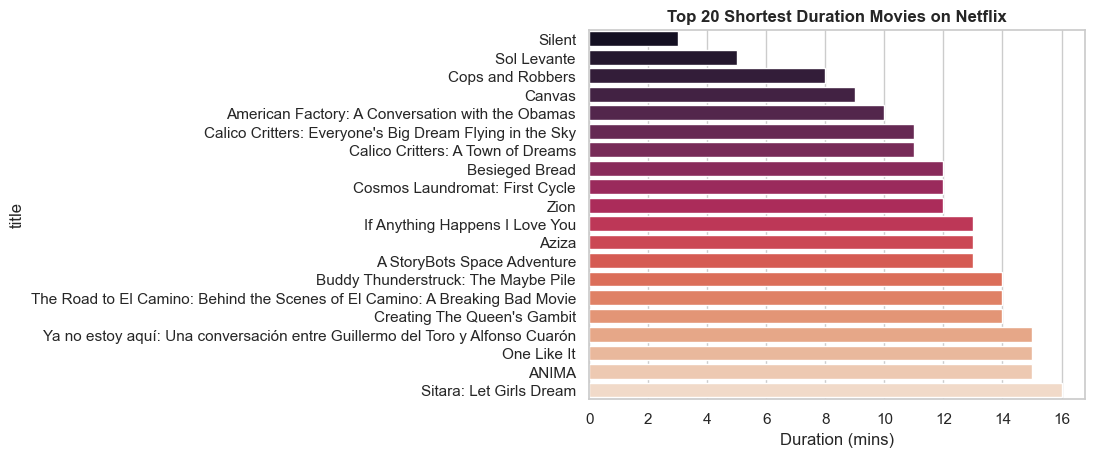

In [46]:
sns.barplot(data=top_20_shortest_movies, x="duration", y="title", orient="h", palette="rocket")
plt.xlabel("Duration (mins)")
plt.title("Top 20 Shortest Duration Movies on Netflix", fontweight="bold")
plt.show()

The results are quite surprising. We see that the shortest movie on Netflix is about 3 minutes long! The film Silent is an animated short film and has won quite a few awards in the animated arts criteria.

Let's conduct a similar anaylsis for TV Shows

In [47]:
netflix_shows["duration"]

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

In [48]:
# Remove any irregularities in the column

tv_shows_duration = netflix_shows.copy()
tv_shows_duration["duration"] = tv_shows_duration["duration"].str.replace("Seasons", "")
tv_shows_duration["duration"] = tv_shows_duration["duration"].str.replace("Season", "")
tv_shows_duration["duration"] = tv_shows_duration["duration"].str.strip()
tv_shows_duration["duration"] = tv_shows_duration["duration"].astype(int)
tv_shows_duration["duration"].unique()

array([ 2,  1,  9,  4,  5,  3,  6,  7, 10,  8, 17, 13, 15, 12, 11])

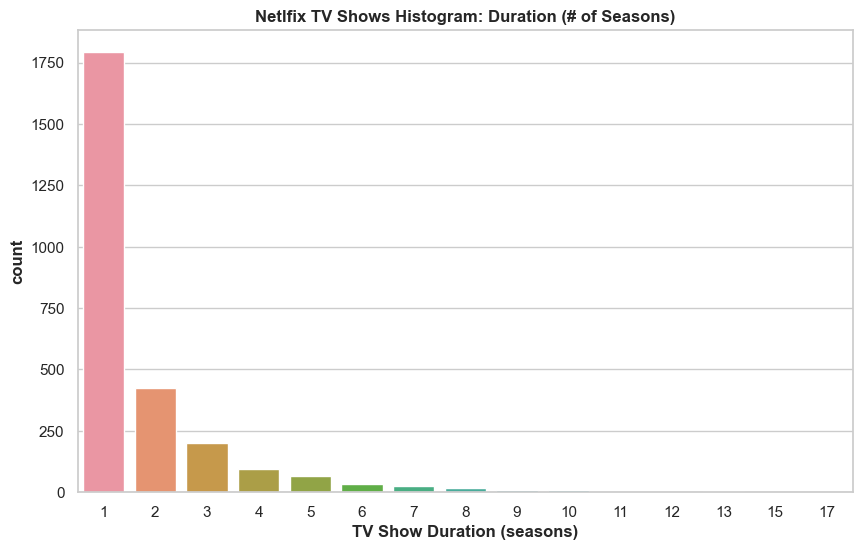

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=tv_shows_duration, x="duration")
plt.xlabel("TV Show Duration (seasons)", fontweight="bold")
plt.ylabel("count", fontweight="bold")
plt.title("Netlfix TV Shows Histogram: Duration (# of Seasons)", fontweight="bold")
plt.show()

From the above plot is is evident that TV shows with only 1 season was most abundant on Netflix. This could be due to many people preferring binge-worthy shows where they can watch the full show in only a few days. Another reason could be that Netflix may have prefer adding newer TV shows where only 1 or 2 seasons have been released at the time.

Let's do some further exploring to find the longest and shortest TV shows on Netflix

In [50]:
# Top 20 longest shows on Netflix
top_20_longest_shows = tv_shows_duration[tv_shows_duration["duration"].index.isin(tv_shows_duration["duration"].nlargest(20).index)].sort_values("duration",ascending=False)
top_20_longest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,July,3.0
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",June,5.0
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,July,1.0
4220,s4221,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,January,1.0
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",N/A,0.0
1354,s1355,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...,February,1.0
4964,s4965,TV Show,Trailer Park Boys,NaN,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-30,2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...,March,30.0
5412,s5413,TV Show,Criminal Minds,NaN,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017-06-30,2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...,June,30.0
6456,s6457,TV Show,Cheers,NaN,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,2017-07-01,1992,TV-PG,11,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o...",July,1.0
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,N/A,0.0


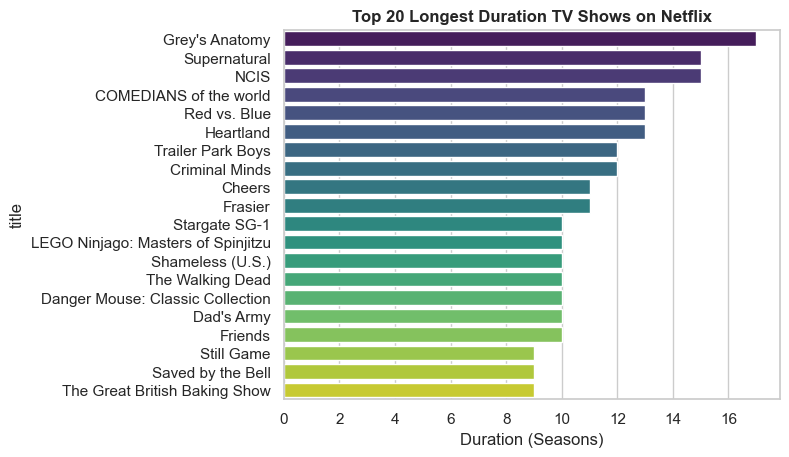

In [51]:
sns.barplot(data=top_20_longest_shows, x="duration", y="title", orient="h", palette="viridis")
plt.xlabel("Duration (Seasons)")
plt.title("Top 20 Longest Duration TV Shows on Netflix", fontweight="bold")
plt.show()

Grey's Anatomy has 17 seasons and is the longest TV show on Netflix followed closely by Supernatural and NCIS, both having 15 seasons. 

In [52]:
# Top 20 shortest TV shows on Netflix
top_20_shortest_shows = tv_shows_duration[tv_shows_duration["duration"].index.isin(tv_shows_duration["duration"].nsmallest(20).index)].sort_values("duration",ascending=True)
top_20_shortest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24.0
70,s71,TV Show,Too Hot To Handle: Latino,NaN,Itatí Cantoral,NaN,2021-09-15,2021,TV-MA,1,"International TV Shows, Reality TV, Romantic T...","On this reality show, singles from Latin Ameri...",September,15.0
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,2021-09-15,2015,TV-PG,1,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,September,15.0
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,September,15.0
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",September,15.0
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",NaN,2021-09-16,2020,TV-MA,1,"International TV Shows, Romantic TV Shows, TV ...",Five glamorous millennials strive for success ...,September,16.0
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,September,16.0
37,s38,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,2021-09-16,2018,TV-Y7,1,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",September,16.0
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,2021-09-17,2020,TV-Y7,1,Kids' TV,Tayo speeds into an adventure when his friends...,September,17.0
33,s34,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,2021-09-17,2021,TV-MA,1,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,September,17.0


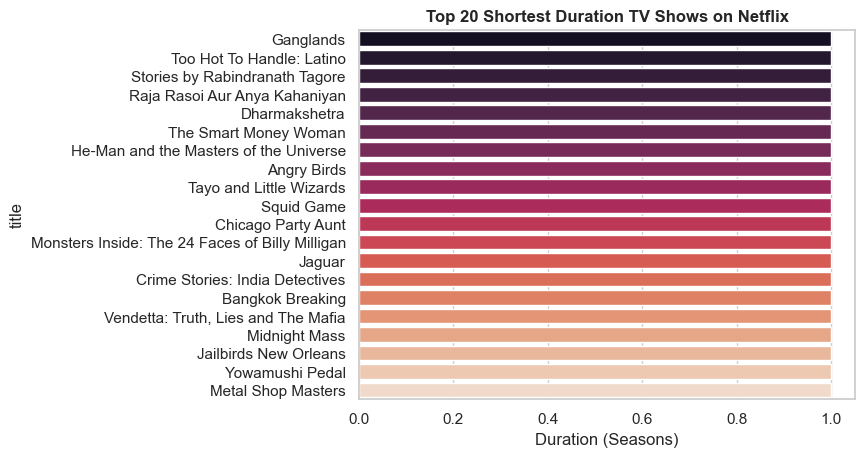

In [53]:
sns.barplot(data=top_20_shortest_shows, x="duration", y="title", orient="h", palette="rocket")
plt.xlabel("Duration (Seasons)")
plt.title("Top 20 Shortest Duration TV Shows on Netflix", fontweight="bold")
plt.show()

As we have seen earlier in the analysis, there are a lot of shows with only 1 season on Netflix. Plenty of content on Netflix to binge watch!

In [54]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

### Director Column

Let us take a look at the countries with the most directors on netflix's overall catalogue

In [55]:
# Top 10 countries with most directors
country_count_directors = data_import.copy()
country_count_directors = pd.concat([country_count_directors, data_import["country"].str.split(",", expand=True)], axis=1)
country_count_directors = country_count_directors.melt(id_vars=["type", "director", "title"], value_vars=range(12), value_name="Country")
country_count_directors = country_count_directors[country_count_directors["Country"].notna()]
country_count_directors["Country"] = country_count_directors["Country"].str.strip()
country_count_directors

,type,director,title,variable,Country
0,Movie,Kirsten Johnson,Dick Johnson Is Dead,0,United States
1,TV Show,NaN,Blood & Water,0,South Africa
4,TV Show,NaN,Kota Factory,0,India
7,Movie,Haile Gerima,Sankofa,0,United States
8,TV Show,Andy Devonshire,The Great British Baking Show,0,United Kingdom
...,...,...,...,...,...
78859,Movie,Joshua Oppenheimer,The Look of Silence,8,Germany
85496,Movie,Matthew Salleh,Barbecue,9,Sweden
87666,Movie,Joshua Oppenheimer,The Look of Silence,9,Netherlands
94303,Movie,Matthew Salleh,Barbecue,10,United States


In [56]:
movie_directors_per_country = country_count_directors[country_count_directors["type"] == "Movie"].groupby("Country").nunique()["director"].reset_index(name="Director Count").sort_values("Director Count", ascending=False)
show_directors_per_country = country_count_directors[country_count_directors["type"] == "TV Show"].groupby("Country").nunique()["director"].reset_index(name="Director Count").sort_values("Director Count", ascending=False)

Top 10 Countries with most directors

Text(0.5, 1.0, 'Number of Movie Directors per Country')

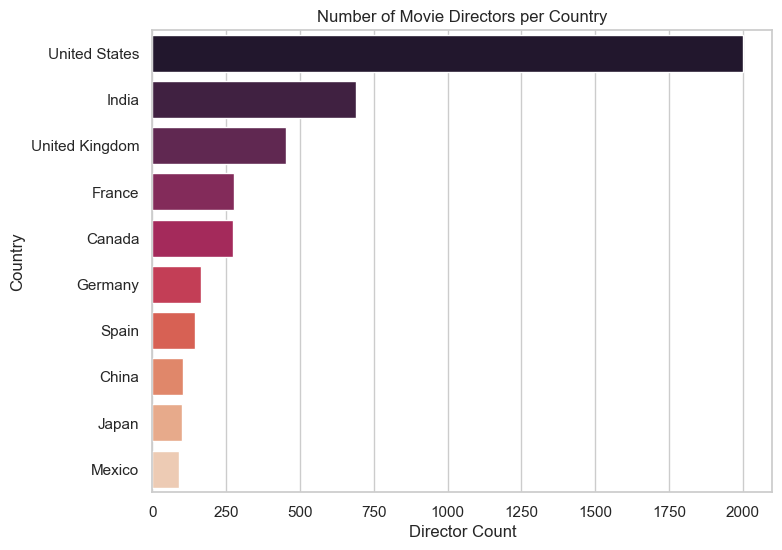

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(data=movie_directors_per_country[:10], x="Director Count", y="Country", orient="h", palette="rocket")
plt.title("Number of Movie Directors per Country")

Looks like most directors on Netflix have been involved with American films. Let's have a look at a similar chart but for TV Show directors.

Text(0.5, 1.0, 'Number of TV Show Directors per Country')

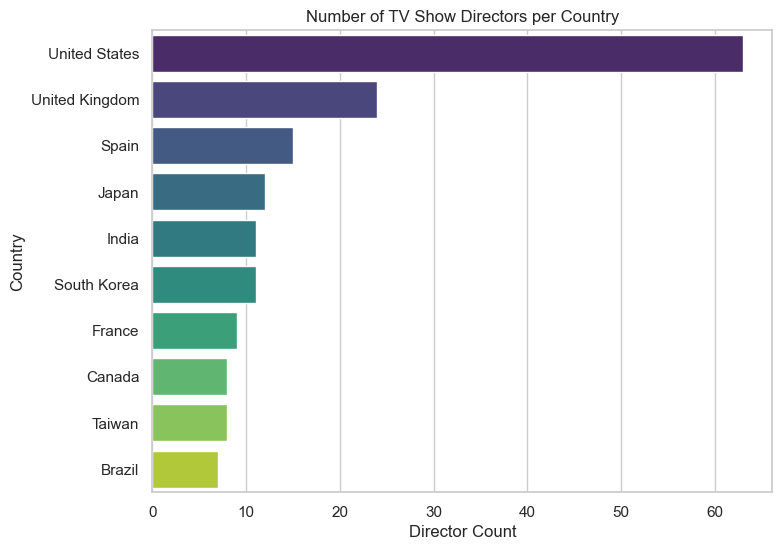

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(data=show_directors_per_country[:10], x="Director Count", y="Country", orient="h", palette="viridis")
plt.title("Number of TV Show Directors per Country")

Seems like USA takes the cake again (unsurprisingly).

Let's look at a treemap of all the directors who have worked on American TV Shows.

In [59]:
netflix_USA=data_import[(data_import["country"]=="United States") & (data_import["type"] == "TV Show")]
nannef=netflix_USA.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

It is interesting to see that the number of titles is spread evenly between all the directors in the American TV Show space. This could be good for new TV show directors looking to get their work added to Netflix as it seems like the competition is fairly balanced.

Let's look at a similar plot for United Kingdom.

In [60]:
netflix_UK=data_import[(data_import["country"]=="United Kingdom") & (data_import["type"] == "TV Show")]
nannef=netflix_UK.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

Again it seems like there is no standout director with a lump share of British TV Show titles on Netflix.

### Genre Column

Let's create a wordcloud plot to look at the dominant movie genres on Netflix.

Credit to NIHARIKA PANDIT

Link: https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda/notebook#Movie-ratings-analysis

In [61]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

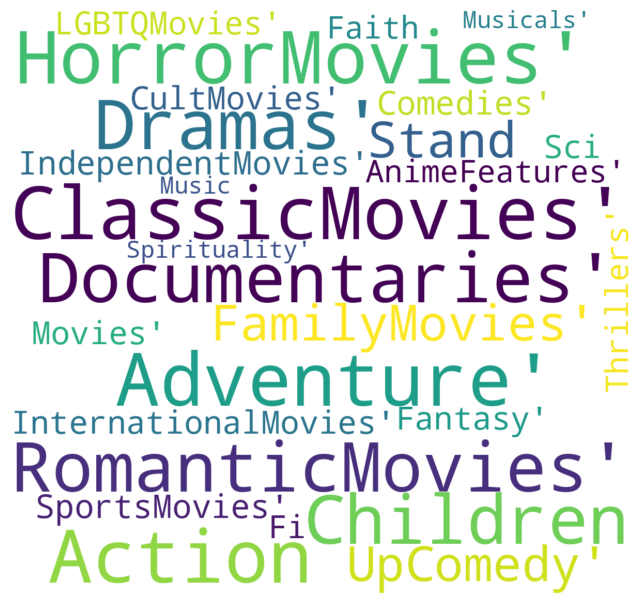

In [77]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (8, 8)

#assigning shape to the word cloud
mask = np.array(Image.open('images\star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

We can see Netflix has numerous genres for movies on their catalagour. Popular genres range from Romantic, Children, Adventure, Horror, Classic and even Documentaries.

Lets do a similar wordcloud for TV shows

In [79]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

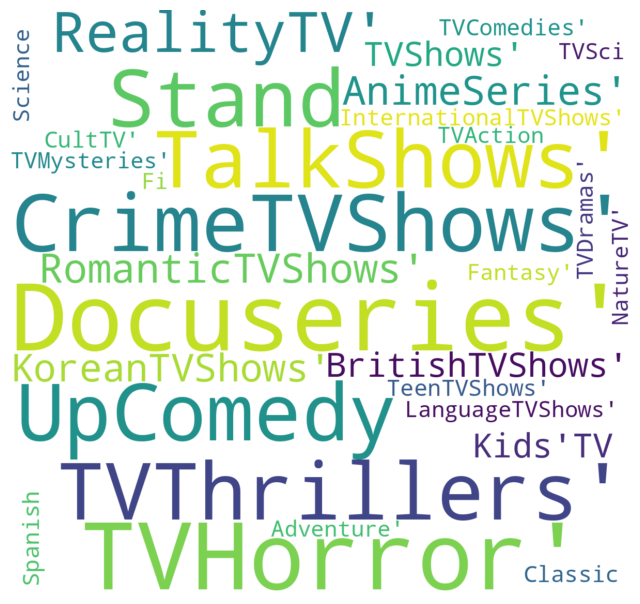

In [80]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (8, 8)

#assigning shape to the word cloud
mask = np.array(Image.open('images\star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Again, Netflix offers many genres in the TV Shows category. It seems like Crime TV shows, Docuseries, Comedy, Talkshow, Horror and Thrillers are amongst the populars.